<a href="https://colab.research.google.com/github/gitders222/gl_ml/blob/main/giant_leap_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
GIANT LEAP TECH KODEOPPGAVE

S.A. TORP

(husk å laste opp .csv data)
```



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical, plot_model

TD:  (5999, 784)
TL:  (5999, 1)
VD:  (999, 784)
VL:  (999, 1)


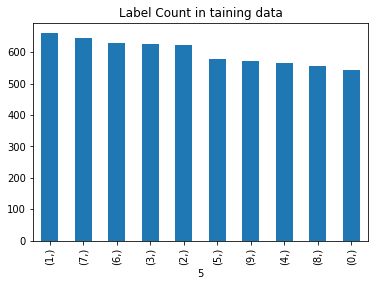

In [ ]:
train_labels = pd.read_csv('train_labels.csv')
train_data = pd.read_csv('train_data.csv')
val_data = pd.read_csv('val_data.csv')
val_labels = pd.read_csv('val_labels.csv')

print("TD: ", train_data.shape)
print("TL: ", train_labels.shape)
print("VD: ", val_data.shape)
print("VL: ", val_labels.shape)

train_labels.value_counts().plot.bar(title='Label Count in taining data')

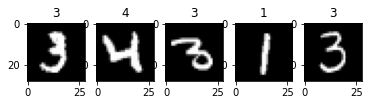

In [ ]:
W = 28
H = 28
FROM = 0
TO = 5

#PLOT DATA SAMPLE
for i in range(FROM,TO):
  plt.subplot(350+1+i)
  img = (np.array(train_data.iloc[i])).reshape(W,H)
  plt.imshow(img, cmap=plt.get_cmap('gray'))
  plt.title(str(train_labels.iloc[i,0]))
plt.show()

In [ ]:
#ONE HOT ENCODE DATA

train_y = to_categorical(train_labels)
val_y = to_categorical(val_labels)

In [ ]:
#NORMALIZE DATA

train_data = train_data.astype('float32') / 255
val_data = val_data.astype('float32') / 255

In [ ]:
#PARAMETERS

batch_size = 128
hidden_units = 256
dropout = 0.45
num_labels = 10

image_size = train_data.shape[1]
input_size = image_size

In [ ]:
#DESIGN ARCHITECTURE

model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                2

In [ ]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_data, train_y, validation_split=0.1, epochs=20, batch_size=batch_size)

Epoch 1/20
43/43 [==============================] - 3s 8ms/step - loss: 1.3278 - accuracy: 0.5655 - val_loss: 0.4725 - val_accuracy: 0.8700
Epoch 2/20
43/43 [==============================] - 0s 4ms/step - loss: 0.5815 - accuracy: 0.8140 - val_loss: 0.3336 - val_accuracy: 0.9033
Epoch 3/20
43/43 [==============================] - 0s 4ms/step - loss: 0.4424 - accuracy: 0.8640 - val_loss: 0.2525 - val_accuracy: 0.9250
Epoch 4/20
43/43 [==============================] - 0s 4ms/step - loss: 0.3723 - accuracy: 0.8822 - val_loss: 0.2266 - val_accuracy: 0.9333
Epoch 5/20
43/43 [==============================] - 0s 4ms/step - loss: 0.3181 - accuracy: 0.9013 - val_loss: 0.2028 - val_accuracy: 0.9450
Epoch 6/20
43/43 [==============================] - 0s 4ms/step - loss: 0.2683 - accuracy: 0.9178 - val_loss: 0.1760 - val_accuracy: 0.9533
Epoch 7/20
43/43 [==============================] - 0s 4ms/step - loss: 0.2404 - accuracy: 0.9279 - val_loss: 0.1668 - val_accuracy: 0.9467
Epoch 8/20
43/43 [==

In [ ]:
loss, acc = model.evaluate(val_data, val_y, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

8/8 [==============================] - 0s 3ms/step - loss: 0.2279 - accuracy: 0.9379

Test accuracy: 93.8%



Test accuracy: 93.8%


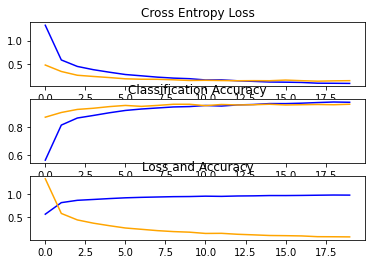

In [ ]:
plt.subplot(3, 1, 1)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')
# plot accuracy

plt.subplot(3,1,2)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')

plt.subplot(3,1,3)
plt.title('Loss and Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train acc')
plt.plot(history.history['loss'], color='orange', label='train loss')

print("\nTest accuracy: %.1f%%" % (100.0 * acc))